# Kiruna mine blasting detection

Blasting measured by smartphones placed at different spots. AndroSensor application was used to data capture.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
kaklik = pd.read_csv('kaklik/Sensor_record_20190917_013944_AndroSensor.csv', index_col="YYYY-MO-DD HH-MI-SS_SSS")
kaklik.index = pd.to_datetime(kaklik.index, format ="%Y-%m-%d %H:%M:%S:%f" ) # 2019-09-16 01:10:27:343

In [2]:
kakl = pd.read_csv('kakl/Sensor_record_20190917_014016_AndroSensor.csv', index_col="YYYY-MO-DD HH-MI-SS_SSS")
kakl.index = pd.to_datetime(kakl.index, format ="%Y-%m-%d %H:%M:%S:%f" ) # 2019-09-16 01:10:27:343

In [3]:
ucho = pd.read_csv('ucho/Sensor_record_20190917_011442_AndroSensor.csv', index_col="YYYY-MO-DD HH-MI-SS_SSS")
ucho.index = pd.to_datetime(ucho.index, format ="%Y-%m-%d %H:%M:%S:%f" ) # 2019-09-16 01:10:27:343

In [4]:
time_range_min = '2019-09-17 01:28:50'
time_range_max = '2019-09-17 01:29:02'

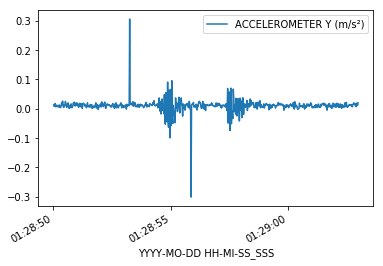

In [5]:
df = kaklik.loc[time_range_min:time_range_max]
df.filter(['ACCELEROMETER Y (m/s²)']).plot()

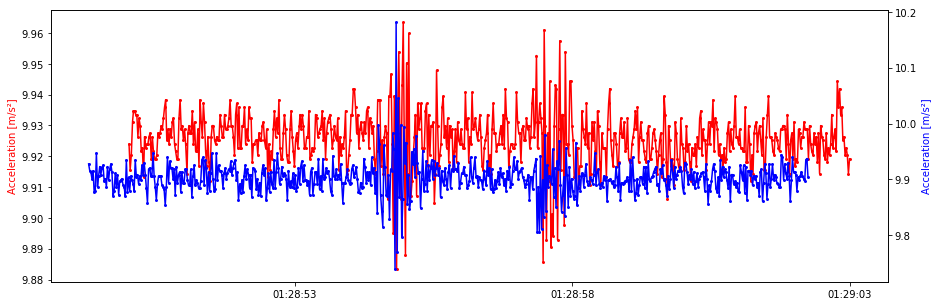

In [6]:
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, sharex=True)
df = kaklik.loc[time_range_min:time_range_max]
ax.plot(df.index, df.filter(['ACCELEROMETER Z (m/s²)']), linestyle='-', label='Count', marker='.', markeredgewidth=0, color='red')

ax.set_ylabel("Acceleration [m/s²]", color='red')

ax1_twin = ax.twinx()
#ax2_twin = ax.twinx()
ax1_twin.set_ylabel("Acceleration [m/s²]", color='blue')

df = kakl.loc[time_range_min:time_range_max]
ax1_twin.plot((df.index - pd.Timedelta(0.73,unit = "s")), df.filter(['ACCELEROMETER Z (m/s²)']), linestyle='-', label='Count', marker='.', markeredgewidth=0, color='blue')

#df = ucho.loc[time_range_min:time_range_max]
#ax2_twin.plot(df.index, df.filter(['ACCELEROMETER Z (m/s²)']), linestyle='', label='Count', marker='.', markeredgewidth=0, color='green')



The graph above shows the recorded waveform from the second and third blasting, which can be felt in kiruna every night between 1:15 and 1:40. 

## Check of datalogging time synchronization

Time synchronisation is critical part of the experiment. Unfortunatelly smartphones have only weak tools to make system time synchronized. Therefore an external method needs to be introduced in measurement. 

We solve this issue by placing the phones in stack and shaking with complete stack during recording already active. 
The captured waveform shows the time-shift between phones exactly. Following code-blocks displays the part of recorded signal where this caliblation technique was performed.  

In [7]:
time_range_min = '2019-09-17 01:14:47'
time_range_max = '2019-09-17 01:14:59'

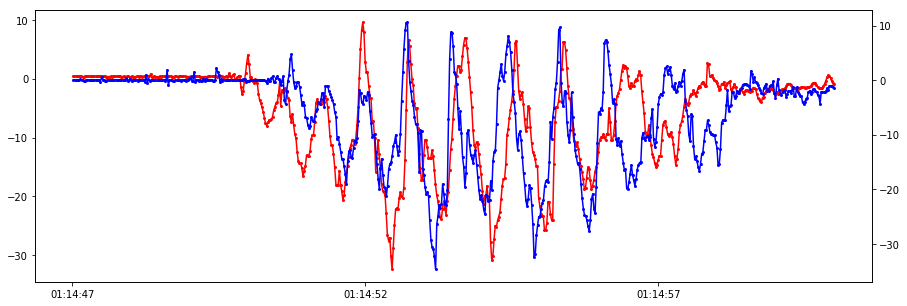

In [8]:
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, sharex=True)
df = kaklik.loc[time_range_min:time_range_max]
ax.plot(df.index, df.filter(['ACCELEROMETER X (m/s²)']), linestyle='-', label='Count', marker='.', markeredgewidth=0, color='red')

ax1_twin = ax.twinx() # make copy of y axis. 

df = kakl.loc[time_range_min:time_range_max]
ax1_twin.plot(df.index, df.filter(['ACCELEROMETER X (m/s²)']), linestyle='-', label='Count', marker='.', markeredgewidth=0, color='blue')



As can be seen above, the time between two phones is shifted about one period of shaking, therefore we should alter the index of dataframe, to match each other.

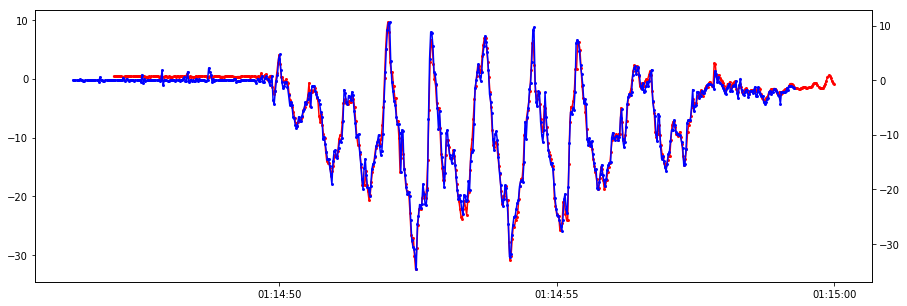

In [9]:
time_offset = 0.73

fig, ax = plt.subplots(figsize=(15, 5), nrows=1, sharex=True)
df = kaklik.loc[time_range_min:time_range_max]
ax.plot(df.index, df.filter(['ACCELEROMETER X (m/s²)']), linestyle='-', label='Count', marker='.', markeredgewidth=0, color='red')

ax1_twin = ax.twinx() # make copy of y axis. 

df = kakl.loc[time_range_min:time_range_max]
ax1_twin.plot((df.index - pd.Timedelta(time_offset,unit = "s")), df.filter(['ACCELEROMETER X (m/s²)']), linestyle='-', label='Count', marker='.', markeredgewidth=0, color='blue')